<a href="https://colab.research.google.com/github/GenoKiller777/PythonVarios/blob/main/Metodologia_GraganMarteen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

## **Enunciado del Problema**:

_Usted ha sido contratado en el ministerio de educación para analizar los resultados de una nueva metodología de educación implementada en el colegio_:
* Graham Parker (GP),    
versus el colegio
* Marteen Sheen (MS),
en donde no fue aplicada la metodología.

_Ambos colegios han tenido históricamente desempeños similares en las notas de sus alumnos._

* **Hipotesis Nula**: _la nueva metodología de enseñanza aplicada en el colegio Grahan Parker tiene un impacto significativo en el resultado de las notas de sus estudiantes, notas que se compararan con el colegio Mareen Sheen al cual no fue aplicada la metodología_.

* **Hipotesis Alternativa**: _la nueva metodología de enseñanza aplicada en el colegio Grahan Parker **No** tiene un impacto significativo en el resultado de las notas de sus estudiantes, notas que se compararan con el colegio Mareen Sheen al cual no fue aplicada la metodología_.

In [4]:
df = pd.read_csv("notas-alumnos.csv")
df

,colegio,sexo,edad,ausencias,N1,N2,N3
0,GP,F,18,6,1.8,2.1,2.1
1,GP,F,17,4,1.8,1.8,2.1
2,GP,F,15,10,2.4,2.8,3.5
3,GP,F,15,2,5.2,4.9,5.2
4,GP,F,16,4,2.1,3.5,3.5
...,...,...,...,...,...,...,...
390,MS,M,20,11,3.2,3.2,3.2
391,MS,M,17,3,4.9,5.6,5.6
392,MS,M,21,3,3.5,2.8,2.4
393,MS,M,18,0,3.9,4.2,3.5


In [5]:
df.info()
#No hay valores faltantes en las variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   colegio    395 non-null    object 
 1   sexo       395 non-null    object 
 2   edad       395 non-null    int64  
 3   ausencias  395 non-null    int64  
 4   N1         395 non-null    float64
 5   N2         395 non-null    float64
 6   N3         395 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 21.7+ KB


Creamos el campo ``` promedio_n ``` , para evaluar el rendimiento global de cada colegio.

In [6]:
df["promedio_n"] = round(( df["N1"] + df["N2"] + df["N3"])/3,2)

In [7]:
df.head(5)

,colegio,sexo,edad,ausencias,N1,N2,N3,promedio_n
0,GP,F,18,6,1.8,2.1,2.1,2.00
1,GP,F,17,4,1.8,1.8,2.1,1.90
2,GP,F,15,10,2.4,2.8,3.5,2.90
3,GP,F,15,2,5.2,4.9,5.2,5.10
4,GP,F,16,4,2.1,3.5,3.5,3.03


Filtro de la data por tipo de **Colegio**:

Queremos comparar el desempeño de 2 colegios:
* GP, el cual usa una metodologia nueva de enseñanza.
* MS, el cual no usa esta metodologia.

Por lo tanto, haremos un filtreo del dataframe en 2, segun los colegios.

Antes, veamos si las muestras que hay
de estudiantes de cada colegio son proporcionales o no.

In [8]:
df["colegio"].value_counts()

GP    349
MS     46
Name: colegio, dtype: int64

Notamos que una de las muestras de estudiantes usados para evaluar el desempeño en cada colegio, es mayor en un colegio que en otro, como se aprecia en las proporciones a continuación:

*   **GP** : 349 / 349 + 46 = 0.884 * 100 = 88.4 %. (_Nueva metodología de educación implementada_)
*   **MS** : 46 / 349 + 46 = 0.116 * 100 = 11.6 %.  (_No fue aplicada la metodología_)

Mas adelante usaremos muestras iguales para comparar el desempeño de los colegios, por ahora, dejaremos cada muestra tal y como esta.


In [9]:
df_GP = df[df["colegio"]=="GP"]
df_MS = df[df["colegio"]=="MS"]

## Análisis Univariado

### Análisis Global

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
edad,395.0,16.696203,1.276043,15.00,16.00,17.00,18.0,22.00
ausencias,395.0,5.708861,8.003096,0.00,0.00,4.00,8.0,75.00
N1,395.0,3.824810,1.164139,1.00,2.80,3.90,4.6,6.60
N2,395.0,3.760506,1.312304,0.00,3.20,3.90,4.6,6.60
N3,395.0,3.654430,1.601205,0.00,2.80,3.90,4.9,7.00
promedio_n,395.0,3.746608,1.291791,0.47,2.93,3.77,4.7,6.73


#### Variable **Promedio de Notas**

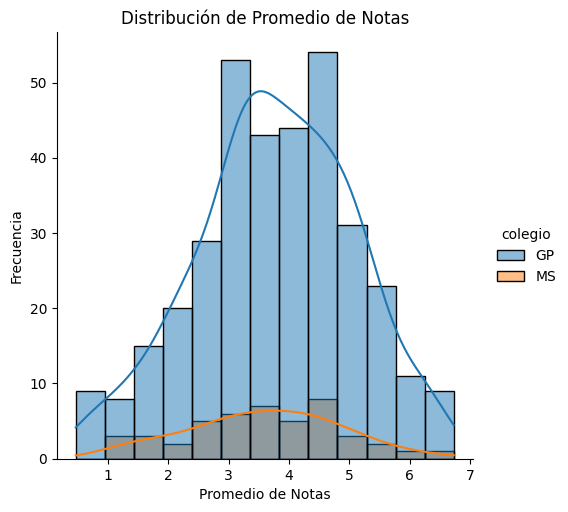

In [142]:
sns.displot(data=df, x="promedio_n", kde=True, hue='colegio')

plt.title("Distribución de Promedio de Notas")
plt.xlabel("Promedio de Notas")
plt.ylabel("Frecuencia")
plt.show()

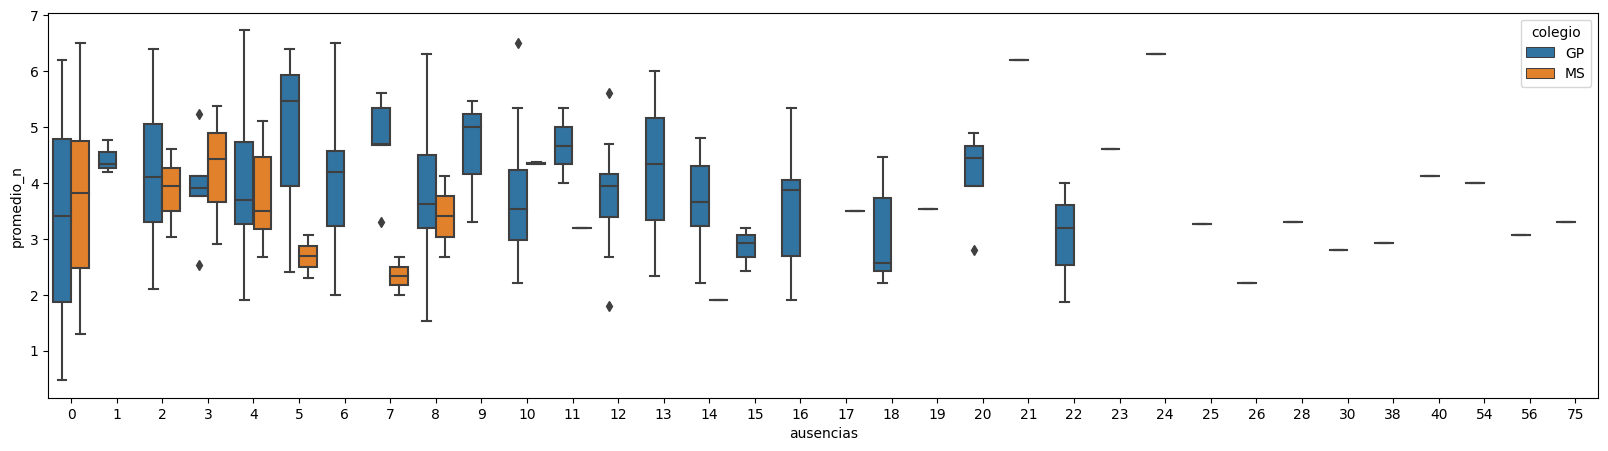

In [12]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df, y="promedio_n", x="ausencias",hue="colegio")
plt.show()

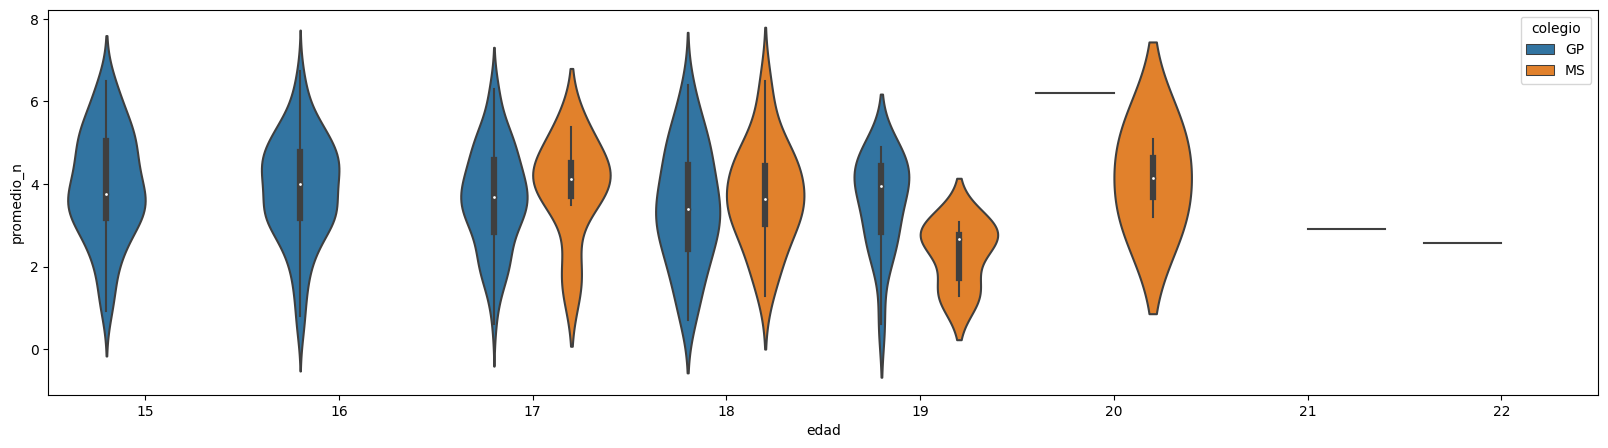

In [13]:
plt.figure(figsize=(20,5))
sns.violinplot(data=df, y="promedio_n", x="edad",hue="colegio")
plt.show()

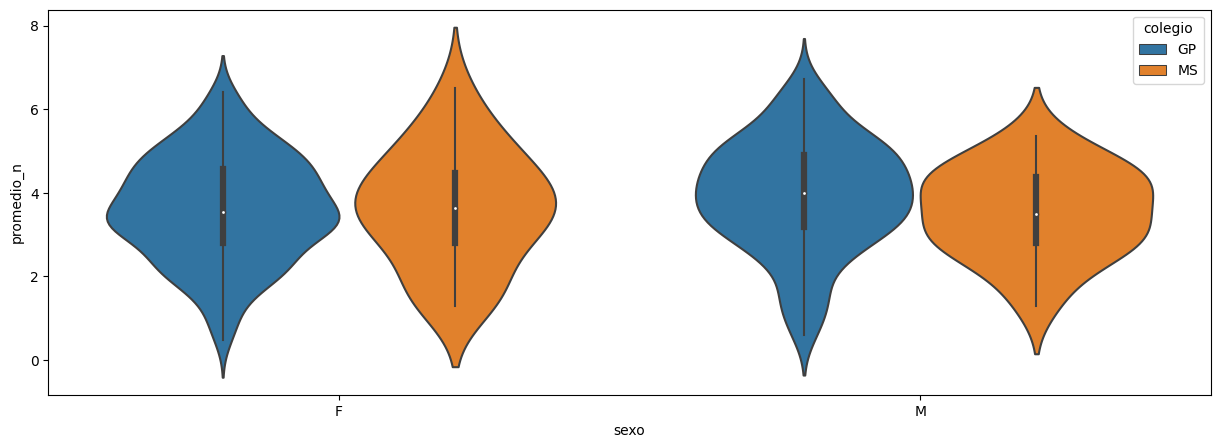

In [14]:
plt.figure(figsize=(15,5))
sns.violinplot(data=df, y="promedio_n", x="sexo",hue="colegio")
plt.show()

In [15]:
df["promedio_n"].value_counts().head(15)

3.17    15
3.30    15
4.33    13
2.80    12
3.77    12
5.33    11
3.50    10
4.00     9
4.10     9
3.40     9
4.47     9
5.00     9
3.63     9
4.70     9
4.80     8
Name: promedio_n, dtype: int64

In [16]:
((df["promedio_n"].value_counts()/sum(df["promedio_n"].value_counts()))*100).sort_values(ascending=False).head(15)

3.17    3.797468
3.30    3.797468
4.33    3.291139
2.80    3.037975
3.77    3.037975
5.33    2.784810
3.50    2.531646
5.00    2.278481
4.70    2.278481
3.63    2.278481
4.47    2.278481
3.40    2.278481
4.10    2.278481
4.00    2.278481
4.80    2.025316
Name: promedio_n, dtype: float64

#### Variable **Edad**

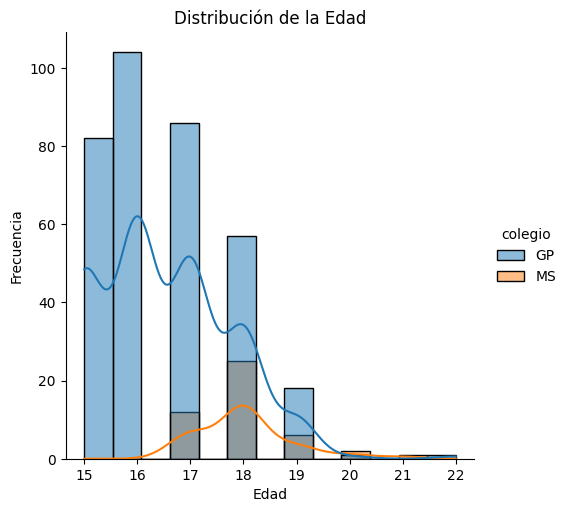

In [143]:
sns.displot(data=df, x="edad", kde=True, hue='colegio')

plt.title("Distribución de la Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

In [18]:
df["edad"].value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: edad, dtype: int64

In [19]:
((df["edad"].value_counts()/sum(df["edad"].value_counts()))*100).sort_values(ascending=False)

16    26.329114
17    24.810127
18    20.759494
15    20.759494
19     6.075949
20     0.759494
22     0.253165
21     0.253165
Name: edad, dtype: float64

#### Variable **Ausencias**

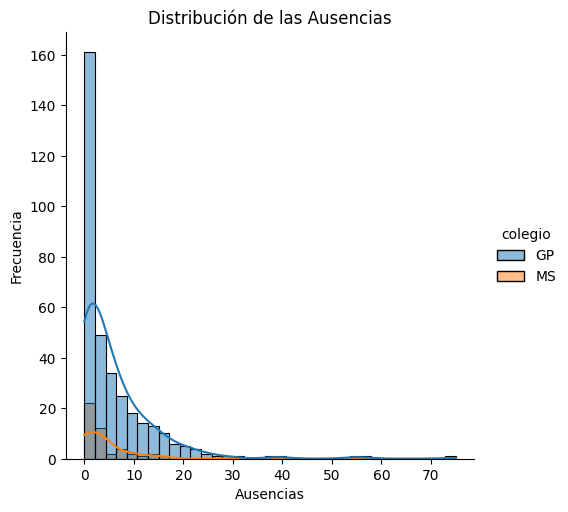

In [144]:
sns.displot(data=df, x="ausencias", kde=True, hue='colegio')

plt.title("Distribución de las Ausencias")
plt.xlabel("Ausencias")
plt.ylabel("Frecuencia")
plt.show()

In [21]:
df["ausencias"].value_counts()

0     115
2      65
4      53
6      31
8      22
10     17
14     12
12     12
3       8
16      7
7       7
5       5
18      5
20      4
11      3
9       3
13      3
15      3
22      3
1       3
38      1
30      1
40      1
23      1
19      1
28      1
75      1
21      1
24      1
56      1
26      1
54      1
25      1
17      1
Name: ausencias, dtype: int64

In [22]:
((df["ausencias"].value_counts()/sum(df["ausencias"].value_counts()))*100).sort_values(ascending=False)

0     29.113924
2     16.455696
4     13.417722
6      7.848101
8      5.569620
10     4.303797
14     3.037975
12     3.037975
3      2.025316
16     1.772152
7      1.772152
5      1.265823
18     1.265823
20     1.012658
1      0.759494
22     0.759494
15     0.759494
13     0.759494
11     0.759494
9      0.759494
21     0.253165
25     0.253165
54     0.253165
26     0.253165
56     0.253165
24     0.253165
28     0.253165
75     0.253165
19     0.253165
23     0.253165
40     0.253165
30     0.253165
38     0.253165
17     0.253165
Name: ausencias, dtype: float64

In [23]:
sum(df["ausencias"].value_counts())

395

In [24]:
sin_ausencias = 115
con_ausencias = 395-115
total_au = 395

print(f'La proporcion de estudiantes sin ausencias global, respecto al total es: {round((sin_ausencias/total_au*100),3)} %.')
print(f'La proporcion de estudiantes con ausencias global, respecto al total es: {round((con_ausencias/total_au*100),3)} %.')

La proporcion de estudiantes sin ausencias global, respecto al total es: 29.114 %.
La proporcion de estudiantes con ausencias global, respecto al total es: 70.886 %.


#### Variable **Sexo**

In [25]:
df["sexo"].value_counts()

F    208
M    187
Name: sexo, dtype: int64

In [26]:
fg = 208
mg = 187
totalg = fg + mg

print(f'La proporción de estudiantes de sexo femenino global es: {round((fg/totalg*100),3)} %.')
print(f'La proporción de estudiantes de sexo masculino global es: {round((mg/totalg*100),3)} %.')

La proporción de estudiantes de sexo femenino global es: 52.658 %.
La proporción de estudiantes de sexo masculino global es: 47.342 %.


### Análisis Colegio Grahan Parker

In [27]:
df_GP.shape

(349, 8)

In [28]:
df_GP.describe().T

,count,mean,std,min,25%,50%,75%,max
edad,349.0,16.521490,1.216610,15.00,16.00,16.00,17.0,22.00
ausencias,349.0,5.965616,8.341764,0.00,0.00,4.00,8.0,75.00
N1,349.0,3.836103,1.163853,1.00,2.80,3.90,4.6,6.60
N2,349.0,3.783381,1.329099,0.00,3.20,3.90,4.6,6.60
N3,349.0,3.680516,1.616641,0.00,2.80,3.90,4.9,7.00
promedio_n,349.0,3.766676,1.299159,0.47,2.93,3.77,4.7,6.73


#### Variable **Promedio de Notas** colegio **Grahan Parker**

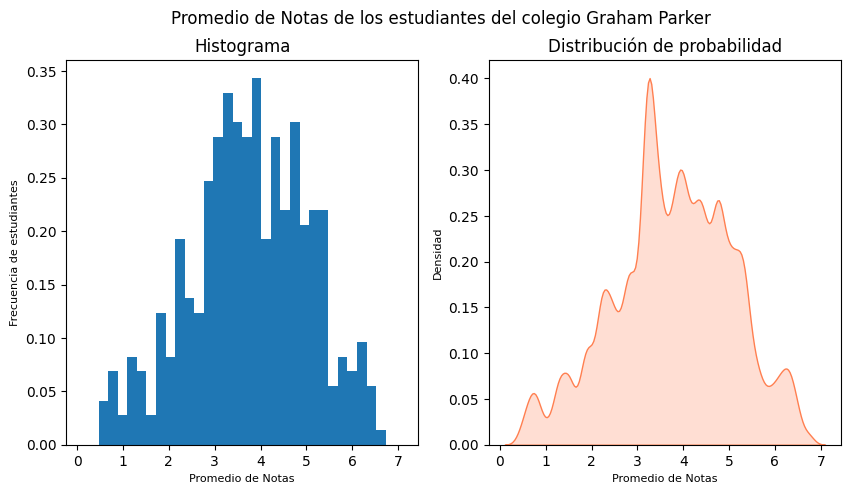

In [29]:
figure, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
figure.suptitle('Promedio de Notas de los estudiantes del colegio Graham Parker')

axes[0].set_title('Histograma')
axes[1].set_title('Distribución de probabilidad')

axes[0].set_xlabel('Promedio de Notas', fontsize = 8)
axes[0].set_ylabel('Frecuencia de estudiantes', fontsize = 8)

axes[1].set_xlabel('Promedio de Notas', fontsize = 8)
axes[1].set_ylabel('Densidad', fontsize = 8)

# Histograma
axes[0].hist(df_GP['promedio_n'], bins = 30 , density=True)
# Gráfica de distribución
sns.kdeplot(ax=axes[1], data = df_GP , x = 'promedio_n', bw_adjust=.3, color='coral', fill =True)

plt.show()

In [63]:
df_GP["promedio_n"].value_counts().head(15)

3.17    14
3.30    14
4.33    11
2.80    10
3.77    10
5.33    10
4.00     9
4.70     9
4.80     8
3.40     8
5.00     8
4.47     8
3.63     8
5.10     7
2.93     7
Name: promedio_n, dtype: int64

In [64]:
((df_GP["promedio_n"].value_counts()/sum(df_GP["promedio_n"].value_counts()))*100).sort_values(ascending=False).head(15)

3.17    4.011461
3.30    4.011461
4.33    3.151862
3.77    2.865330
5.33    2.865330
2.80    2.865330
4.00    2.578797
4.70    2.578797
5.00    2.292264
4.47    2.292264
3.63    2.292264
3.40    2.292264
4.80    2.292264
5.10    2.005731
2.93    2.005731
Name: promedio_n, dtype: float64

#### Variable **Edad** colegio **Grahan Parker**

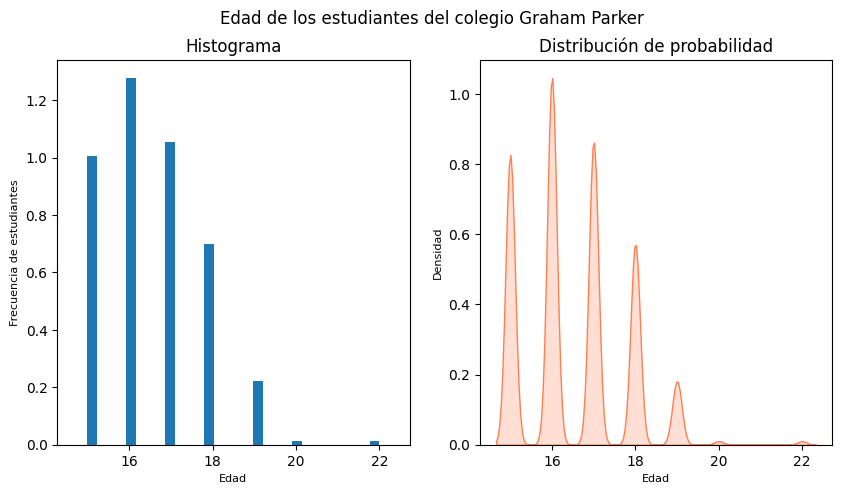

In [32]:
figure, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
figure.suptitle('Edad de los estudiantes del colegio Graham Parker')

axes[0].set_title('Histograma')
axes[1].set_title('Distribución de probabilidad')

axes[0].set_xlabel('Edad', fontsize = 8)
axes[0].set_ylabel('Frecuencia de estudiantes', fontsize = 8)

axes[1].set_xlabel('Edad', fontsize = 8)
axes[1].set_ylabel('Densidad', fontsize = 8)

# Histograma
axes[0].hist(df_GP['edad'], bins = 30 , density=True)
# Gráfica de distribución
sns.kdeplot(ax=axes[1], data = df_GP , x = 'edad', bw_adjust=.3, color='coral', fill =True)

plt.show()

In [33]:
df_GP["edad"].value_counts()

16    104
17     86
15     82
18     57
19     18
22      1
20      1
Name: edad, dtype: int64

In [34]:
((df_GP["edad"].value_counts()/sum(df_GP["edad"].value_counts()))*100).sort_values(ascending=False)

16    29.799427
17    24.641834
15    23.495702
18    16.332378
19     5.157593
22     0.286533
20     0.286533
Name: edad, dtype: float64

#### Variable **Ausencias** colegio **Grahan Parker**

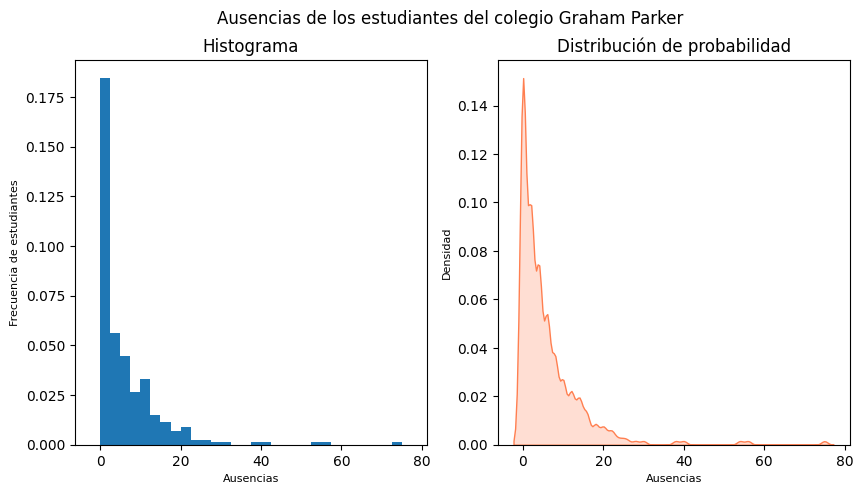

In [35]:
figure, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
figure.suptitle('Ausencias de los estudiantes del colegio Graham Parker')

axes[0].set_title('Histograma')
axes[1].set_title('Distribución de probabilidad')

axes[0].set_xlabel('Ausencias', fontsize = 8)
axes[0].set_ylabel('Frecuencia de estudiantes', fontsize = 8)

axes[1].set_xlabel('Ausencias', fontsize = 8)
axes[1].set_ylabel('Densidad', fontsize = 8)

# Histograma
axes[0].hist(df_GP['ausencias'], bins = 30 , density=True)
# Gráfica de distribución
sns.kdeplot(ax=axes[1], data = df_GP , x = 'ausencias', bw_adjust=.3, color='coral', fill =True)

plt.show()

In [36]:
df_GP["ausencias"].value_counts()

0     99
2     59
4     44
6     31
8     20
10    15
12    12
14    10
16     7
3      5
18     5
7      5
20     4
9      3
5      3
13     3
15     3
22     3
1      3
11     2
38     1
75     1
40     1
19     1
30     1
24     1
21     1
28     1
56     1
26     1
54     1
25     1
23     1
Name: ausencias, dtype: int64

In [37]:
((df_GP["ausencias"].value_counts()/sum(df_GP["ausencias"].value_counts()))*100).sort_values(ascending=False)

0     28.366762
2     16.905444
4     12.607450
6      8.882521
8      5.730659
10     4.297994
12     3.438395
14     2.865330
16     2.005731
3      1.432665
18     1.432665
7      1.432665
20     1.146132
1      0.859599
22     0.859599
15     0.859599
13     0.859599
9      0.859599
5      0.859599
11     0.573066
21     0.286533
25     0.286533
54     0.286533
26     0.286533
56     0.286533
28     0.286533
30     0.286533
24     0.286533
19     0.286533
40     0.286533
75     0.286533
38     0.286533
23     0.286533
Name: ausencias, dtype: float64

In [38]:
sum(df_GP["ausencias"].value_counts())

349

In [39]:
sin_ausencias_gp = 99
con_ausencias_gp = 349-99
total_au_gp = 349

print(f'La proporcion de estudiantes sin ausencias respecto al total es: {round((sin_ausencias_gp/total_au_gp*100),3)} %.')
print(f'La proporcion de estudiantes con ausencias respecto al total es: {round((con_ausencias_gp/total_au_gp*100),3)} %.')

La proporcion de estudiantes sin ausencias respecto al total es: 28.367 %.
La proporcion de estudiantes con ausencias respecto al total es: 71.633 %.


#### Variable **Sexo** colegio **Grahan Parker**

In [40]:
df_GP["sexo"].value_counts()

F    183
M    166
Name: sexo, dtype: int64

In [41]:
fgp = 183
mgp = 166
totalgp = fgp + mgp

print(f'La proporción de estudiantes de sexo femenino del colegio Grahan Parker, respecto del total es: {round((fgp/totalgp*100),3)} %.')
print(f'La proporción de estudiantes de sexo masculino del colegio Grahan Parker, respecto del total es: {round((mgp/totalgp*100),3)} %.')

La proporción de estudiantes de sexo femenino del colegio Grahan Parker, respecto del total es: 52.436 %.
La proporción de estudiantes de sexo masculino del colegio Grahan Parker, respecto del total es: 47.564 %.


### Análisis Colegio Marteen Sheen

In [42]:
df_MS.shape

(46, 8)

In [43]:
df_MS.describe().T

,count,mean,std,min,25%,50%,75%,max
edad,46.0,18.021739,0.881643,17.0,17.25,18.000,18.000,21.0
ausencias,46.0,3.760870,4.274913,0.0,0.00,3.000,4.750,17.0
N1,46.0,3.739130,1.175581,2.1,2.80,3.700,4.600,6.6
N2,46.0,3.586957,1.175795,1.8,2.80,3.500,4.500,6.3
N3,46.0,3.456522,1.480338,0.0,2.80,3.500,4.500,6.6
promedio_n,46.0,3.594348,1.237475,1.3,2.80,3.565,4.415,6.5


#### Variable **Promedio de Notas** colegio **Marteen Sheen**

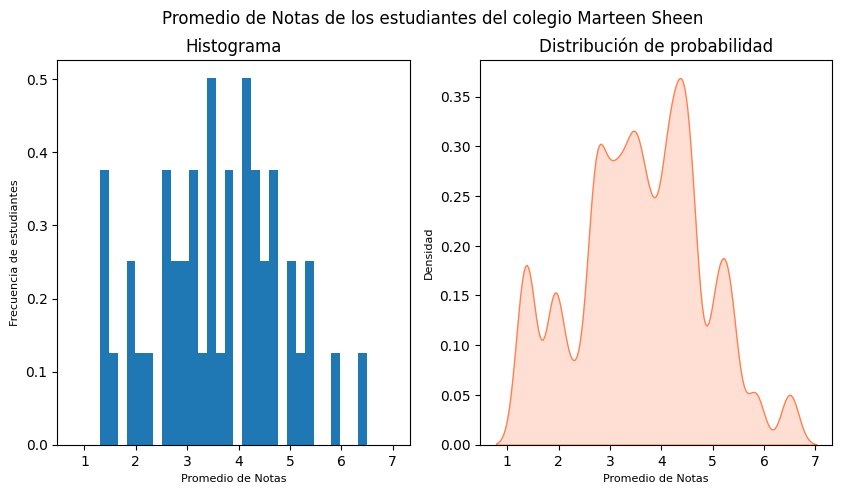

In [44]:
figure, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
figure.suptitle('Promedio de Notas de los estudiantes del colegio Marteen Sheen')

axes[0].set_title('Histograma')
axes[1].set_title('Distribución de probabilidad')

axes[0].set_xlabel('Promedio de Notas', fontsize = 8)
axes[0].set_ylabel('Frecuencia de estudiantes', fontsize = 8)

axes[1].set_xlabel('Promedio de Notas', fontsize = 8)
axes[1].set_ylabel('Densidad', fontsize = 8)

# Histograma
axes[0].hist(df_MS['promedio_n'], bins = 30 , density=True)
# Gráfica de distribución
sns.kdeplot(ax=axes[1], data = df_MS , x = 'promedio_n', bw_adjust=.3, color='coral', fill =True)

plt.show()

In [45]:
df_MS["promedio_n"].value_counts().head(15)

4.60    3
2.67    3
3.50    3
1.90    2
4.10    2
1.30    2
3.77    2
4.33    2
4.13    2
2.80    2
2.90    1
5.37    1
5.20    1
3.87    1
3.20    1
Name: promedio_n, dtype: int64

In [46]:
((df_MS["promedio_n"].value_counts()/sum(df_MS["promedio_n"].value_counts()))*100).sort_values(ascending=False).head(15)

4.60    6.521739
3.50    6.521739
2.67    6.521739
1.90    4.347826
4.10    4.347826
1.30    4.347826
3.77    4.347826
4.33    4.347826
4.13    4.347826
2.80    4.347826
3.63    2.173913
3.03    2.173913
6.50    2.173913
4.43    2.173913
3.30    2.173913
Name: promedio_n, dtype: float64

#### Variable **Edad** colegio **Marteen Sheen**

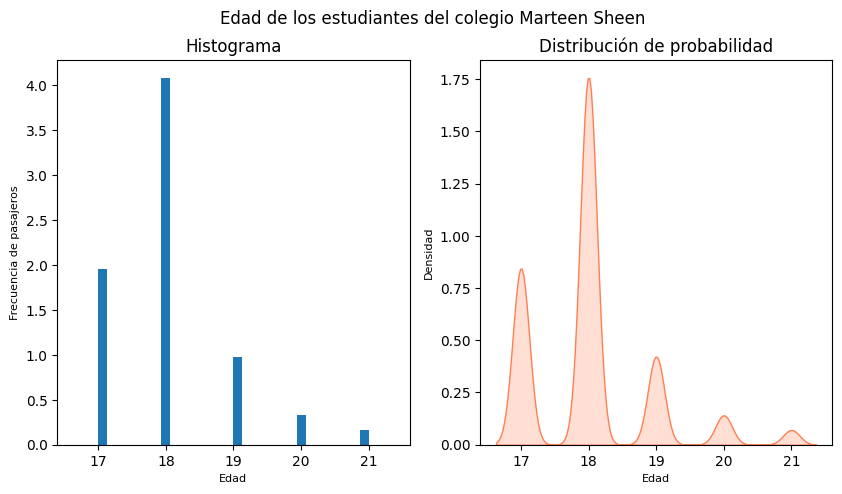

In [47]:
figure, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
figure.suptitle('Edad de los estudiantes del colegio Marteen Sheen')

axes[0].set_title('Histograma')
axes[1].set_title('Distribución de probabilidad')

axes[0].set_xlabel('Edad', fontsize = 8)
axes[0].set_ylabel('Frecuencia de pasajeros', fontsize = 8)

axes[1].set_xlabel('Edad', fontsize = 8)
axes[1].set_ylabel('Densidad', fontsize = 8)

# Histograma
axes[0].hist(df_MS['edad'], bins = 30 , density=True)
# Gráfica de distribución
sns.kdeplot(ax=axes[1], data = df_MS , x = 'edad', bw_adjust=.3, color='coral', fill =True)

plt.show()

In [48]:
df_MS["edad"].value_counts()

18    25
17    12
19     6
20     2
21     1
Name: edad, dtype: int64

In [49]:
((df_MS["edad"].value_counts()/sum(df_MS["edad"].value_counts()))*100).sort_values(ascending=False)

18    54.347826
17    26.086957
19    13.043478
20     4.347826
21     2.173913
Name: edad, dtype: float64

#### Variable **Ausencias** colegio **Marteen Sheen**

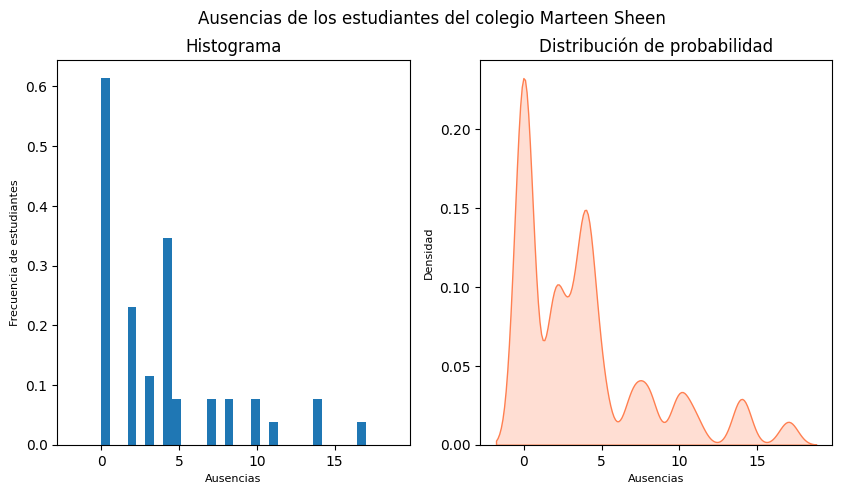

In [50]:
figure, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
figure.suptitle('Ausencias de los estudiantes del colegio Marteen Sheen')

axes[0].set_title('Histograma')
axes[1].set_title('Distribución de probabilidad')

axes[0].set_xlabel('Ausencias', fontsize = 8)
axes[0].set_ylabel('Frecuencia de estudiantes', fontsize = 8)

axes[1].set_xlabel('Ausencias', fontsize = 8)
axes[1].set_ylabel('Densidad', fontsize = 8)

# Histograma
axes[0].hist(df_MS['ausencias'], bins = 30 , density=True)
# Gráfica de distribución
sns.kdeplot(ax=axes[1], data = df_MS , x = 'ausencias', bw_adjust=.3, color='coral', fill =True)

plt.show()

In [51]:
df_MS["ausencias"].value_counts()

0     16
4      9
2      6
3      3
10     2
8      2
7      2
14     2
5      2
17     1
11     1
Name: ausencias, dtype: int64

In [52]:
((df_MS["ausencias"].value_counts()/sum(df_MS["ausencias"].value_counts()))*100).sort_values(ascending=False)

0     34.782609
4     19.565217
2     13.043478
3      6.521739
10     4.347826
8      4.347826
7      4.347826
14     4.347826
5      4.347826
17     2.173913
11     2.173913
Name: ausencias, dtype: float64

In [53]:
sum(df_MS["ausencias"].value_counts())

46

In [129]:
sin_ausencias_ms = 16
con_ausencias_ms = 46-16
total_au_ms = 46

print(f'La proporcion de estudiantes sin ausencias respecto al total es: {round((sin_ausencias_ms/total_au_ms*100),3)} %.')
print(f'La proporcion de estudiantes con ausencias respecto al total es: {round((con_ausencias_ms/total_au_ms*100),3)} %.')

La proporcion de estudiantes sin ausencias respecto al total es: 34.783 %.
La proporcion de estudiantes con ausencias respecto al total es: 65.217 %.


#### Variable **Sexo** colegio **Marteen Sheen**

In [55]:
df_MS["sexo"].value_counts()

F    25
M    21
Name: sexo, dtype: int64

In [56]:
fms = 25
mms = 21
totalms = fms + mms

print(f'La proporción de estudiantes de sexo femenino del colegio Marteen Sheen, respecto del total es: {round((fms/totalms*100),3)} %.')
print(f'La proporción de estudiantes de sexo masculino del colegio Marteen Sheen, respecto del total es: {round((mms/totalms*100),3)} %.')

La proporción de estudiantes de sexo femenino del colegio Marteen Sheen, respecto del total es: 54.348 %.
La proporción de estudiantes de sexo masculino del colegio Marteen Sheen, respecto del total es: 45.652 %.


### Conclusiones iniciales de datos

In [66]:
print('----- Sexo estudiantes Global -----')
print(f'La proporción de estudiantes de sexo femenino global es: {round((fg/totalg*100),3)} %.')
print(f'La proporción de estudiantes de sexo masculino global es: {round((mg/totalg*100),3)} %.')
print('###################################################################')
print()
print('----- Sexo colegio Grahan Parker -----')
print(f'La proporción de estudiantes de sexo femenino del colegio Grahan Parker, respecto del total es: {round((fgp/totalgp*100),3)} %.')
print(f'La proporción de estudiantes de sexo masculino del colegio Grahan Parker, respecto del total es: {round((mgp/totalgp*100),3)} %.')
print('###################################################################')
print()
print('----- Sexo colegio Marteen Sheen -----')
print(f'La proporción de estudiantes de sexo femenino del colegio Marteen Sheen, respecto del total es: {round((fms/totalms*100),3)} %.')
print(f'La proporción de estudiantes de sexo masculino del colegio Marteen Sheen, respecto del total es: {round((mms/totalms*100),3)} %.')
print('###################################################################')

----- Sexo estudiantes Global -----
La proporción de estudiantes de sexo femenino global es: 52.658 %.
La proporción de estudiantes de sexo masculino global es: 47.342 %.
###################################################################

----- Sexo colegio Grahan Parker -----
La proporción de estudiantes de sexo femenino del colegio Grahan Parker, respecto del total es: 52.436 %.
La proporción de estudiantes de sexo masculino del colegio Grahan Parker, respecto del total es: 47.564 %.
###################################################################

----- Sexo colegio Marteen Sheen -----
La proporción de estudiantes de sexo femenino del colegio Marteen Sheen, respecto del total es: 54.348 %.
La proporción de estudiantes de sexo masculino del colegio Marteen Sheen, respecto del total es: 45.652 %.
###################################################################


1. Las proporciones entre estudiantes de ambos sexos masculino y femenino, respecto al total de estudiantes en las muestras de cada colegio, son parecidas aproximadamente, en ambos colegios hay más estudiantes femeninas que estudiantes masculinos, sin embargo, en el colegio donde se aplica la nueva metodología, el porcentaje femenino respecto al total es menor que en el segundo colegio, mientras que al contrario, la presencia masculina es mayor en el colegio donde se aplica la nueva metodología que donde no se aplica la nueva metodología, aunque estas diferencias en ambos casos son apenas de casi el **2%**.

In [75]:
print('----- Edad colegio Grahan Parker -----')
print(((df_GP["edad"].value_counts()/sum(df_GP["edad"].value_counts()))*100).sort_values(ascending=False))
print('########################################')
print('')
print('########################################')
print('----- Edad colegio Marteen Sheen -----')
print(((df_MS["edad"].value_counts()/sum(df_MS["edad"].value_counts()))*100).sort_values(ascending=False))

----- Edad colegio Grahan Parker -----
16    29.799427
17    24.641834
15    23.495702
18    16.332378
19     5.157593
22     0.286533
20     0.286533
Name: edad, dtype: float64
########################################

########################################
----- Edad colegio Marteen Sheen -----
18    54.347826
17    26.086957
19    13.043478
20     4.347826
21     2.173913
Name: edad, dtype: float64


2. El colegio que aplica la nueva metodología tiene estudiantes entre los _15 y 22 años_, mientras que el que no la aplica, solo tiene estudiantes entre los _17 y 21 años_.

In [80]:
print('----- Ausencias colegio Grahan Parker -----')
print(f'La proporcion de estudiantes sin ausencias respecto al total es: {round((sin_ausencias_gp/total_au_gp*100),3)} %.')
print(f'La proporcion de estudiantes con ausencias respecto al total es: {round((con_ausencias_gp/total_au_gp*100),3)} %.')
print('######################################################################')
print('----- Ausencias colegio Marteen Sheen -----')
print(f'La proporcion de estudiantes sin ausencias respecto al total es: {round((sin_ausencias_ms/total_au_ms*100),3)} %.')
print(f'La proporcion de estudiantes con ausencias respecto al total es: {round((con_ausencias_ms/total_au_ms*100),3)} %.')

----- Ausencias colegio Grahan Parker -----
La proporcion de estudiantes sin ausencias respecto al total es: 28.367 %.
La proporcion de estudiantes con ausencias respecto al total es: 71.633 %.
######################################################################
----- Ausencias colegio Marteen Sheen -----
La proporcion de estudiantes sin ausencias respecto al total es: 34.783 %.
La proporcion de estudiantes con ausencias respecto al total es: 65.217 %.


3. Los porcentajes de estudiantes con y sin ausencias, son casi aproximables ya que en ambos colegios es casi el **30%** de su muestra la que no tiene ausencias respecto a los que sí.

## Pre Balanceo - para confirmar hipotesis

In [130]:
from sklearn.utils import resample

df_majority = df[df['colegio'] == 'GP']
df_minority = df[df['colegio']== 'MS']

df_majority_downsampled = resample(df_majority, replace=True, n_samples=len(df_minority), random_state=42)

df_balanced = pd.concat([df_majority_downsampled, df_minority])

In [131]:
df_balanced['colegio'].value_counts()

GP    46
MS    46
Name: colegio, dtype: int64

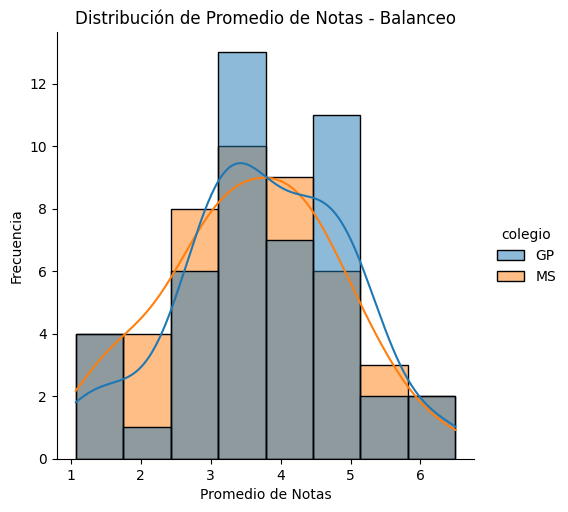

In [145]:
sns.displot(data=df_balanced, x="promedio_n", kde=True, hue='colegio')

plt.title("Distribución de Promedio de Notas - Balanceo")
plt.xlabel("Promedio de Notas")
plt.ylabel("Frecuencia")
plt.show()

In [133]:
df_balanced[df_balanced.colegio =='GP']['promedio_n'].describe()

count    46.000000
mean      3.756304
std       1.204964
min       1.070000
25%       3.170000
50%       3.580000
75%       4.742500
max       6.300000
Name: promedio_n, dtype: float64

In [134]:
df_balanced[df_balanced.colegio =='MS']['promedio_n'].describe()

count    46.000000
mean      3.594348
std       1.237475
min       1.300000
25%       2.800000
50%       3.565000
75%       4.415000
max       6.500000
Name: promedio_n, dtype: float64

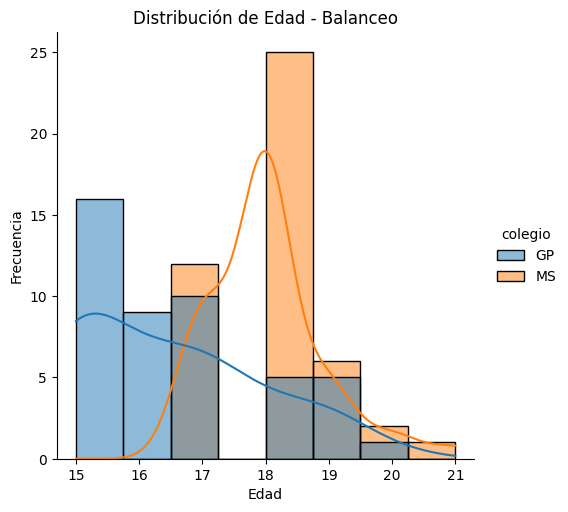

In [146]:
sns.displot(data=df_balanced, x="edad", kde=True, hue='colegio')

plt.title("Distribución de Edad - Balanceo")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

In [136]:
df_balanced[df_balanced.colegio =='MS']['edad'].describe()

count    46.000000
mean     18.021739
std       0.881643
min      17.000000
25%      17.250000
50%      18.000000
75%      18.000000
max      21.000000
Name: edad, dtype: float64

In [135]:
df_balanced[df_balanced.colegio =='GP']['edad'].describe()

count    46.000000
mean     16.500000
std       1.456785
min      15.000000
25%      15.000000
50%      16.000000
75%      17.000000
max      20.000000
Name: edad, dtype: float64

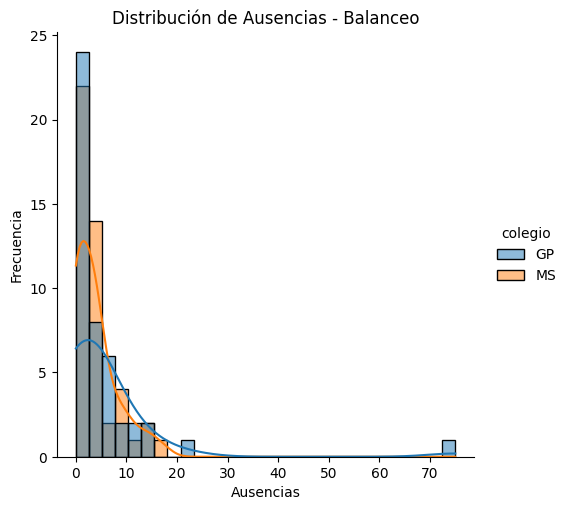

In [147]:
sns.displot(data=df_balanced, x="ausencias", kde=True, hue='colegio')

plt.title("Distribución de Ausencias - Balanceo")
plt.xlabel("Ausencias")
plt.ylabel("Frecuencia")
plt.show()

In [127]:
df_balanced[df_balanced.colegio =='GP']['ausencias'].describe()

count    46.000000
mean      6.173913
std       7.855089
min       0.000000
25%       0.000000
50%       2.000000
75%       9.500000
max      40.000000
Name: ausencias, dtype: float64

In [128]:
df_balanced[df_balanced.colegio =='MS']['ausencias'].describe()

count    46.000000
mean      3.760870
std       4.274913
min       0.000000
25%       0.000000
50%       3.000000
75%       4.750000
max      17.000000
Name: ausencias, dtype: float64

### Conclusión de Balanceo

Las muestras balanceadas se comportan de forma similar a sus estructuras originales, por lo cual se aprecia que se debe realizar más filtrados de valores en filas de la muestra Colegio Grahan Parker para contrastarla con la muestra del Colegio Marteen Sheen para Aprobar o No Aprobar la hipótesis del cambio de la nueva metodología.

# Filtración progresivo de la muestra del colegio GP

Para comparar bien los desempeños de ambos colegios, tienen que haber condiciones similares.

Lo primero en realizar será medir el desempeño solo de aquellos estudiantes que tienen entre 17 y 21, ya que, en el otro colegio, ese es el rango de edad de los estudiantes que están en la muestra.

### 1° Filtreo por variable **Edad**

In [139]:
df_GP_filter = df_GP.copy()
df_GP_filter = df_GP_filter[(df_GP_filter["edad"] >= 17) & (df_GP_filter["edad"] <= 21)]
df_GP_filter.shape

(162, 8)

In [163]:
muestras_antes = 349
muestras_ahora = 162

porcentaje = (muestras_ahora-muestras_antes)/muestras_antes
print(f'Los datos son ahora un {abs(round(porcentaje*100,3))} % menos, de la muestra filtrada al colegio "Grahan Parker".')

Los datos son ahora un 53.582 % menos, de la muestra filtrada al colegio "Grahan Parker".


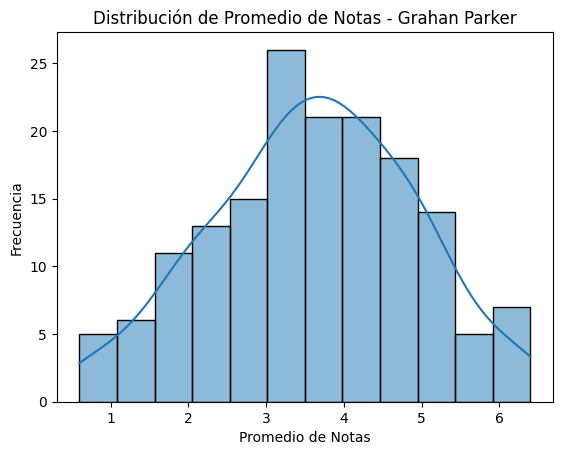

In [164]:
sns.histplot(data = df_GP_filter, x = "promedio_n", kde = True, bins = 12)
plt.title("Distribución de Promedio de Notas - Grahan Parker")
plt.xlabel("Promedio de Notas")
plt.ylabel("Frecuencia")
plt.show()

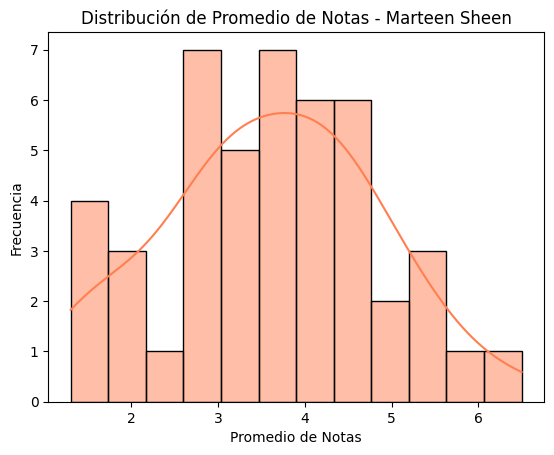

In [171]:
sns.histplot(data = df_MS, x = "promedio_n", bins = 12, kde = True, color='coral')
plt.title("Distribución de Promedio de Notas - Marteen Sheen")
plt.xlabel("Promedio de Notas")
plt.ylabel("Frecuencia")
plt.show()

In [166]:
df_GP_filter["promedio_n"].describe()

count    162.000000
mean       3.608765
std        1.301800
min        0.600000
25%        2.800000
50%        3.630000
75%        4.570000
max        6.400000
Name: promedio_n, dtype: float64

In [167]:
df_MS["promedio_n"].describe()

count    46.000000
mean      3.594348
std       1.237475
min       1.300000
25%       2.800000
50%       3.565000
75%       4.415000
max       6.500000
Name: promedio_n, dtype: float64

 Notamos que, para estudiantes de el mismo rango de edad, para cada colegio por separado, pasa los siguiente:  

* El promedio de ambos grupos de estudiantes es casi el mismo, el colegio que aplica la metodología nueva le gana al otro colegio en promedio de notas en apenas casi 0.01 unidades, lo cual significa que, para estudiantes del mismo rango de edad de ambos colegios, la metodología nueva no tiene efectos positivos notorios en los resultados en comparación a los estudiantes donde no se aplica la metodología y tienen la misma edad.

* Además, notamos que para el 25% de las muestras y para el 50% del total de ambas muestras, las notas máximas alcanzadas son similares, sin embargo, si se considera el 75% de la muestra de cada colegio, se puede ver que en el primer colegio se alcanza en general una mejor nota que en el segundo, aunque por apenas 2 décimas, aproximadamente. Sin embargo, en el segundo colegio, donde no se aplica la nueva metodología, la nota máxima y mínima son mejor en promedio que la nota máxima y mínima en promedio alcanzada en el colegio donde aplican esta nueva metodología.


Por otro lado, el numero maximo de ausencias en el colegio donde aplican la nueva metodologia es de:

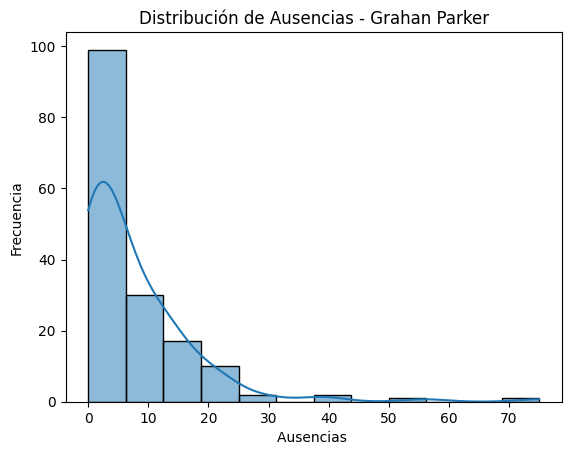

In [176]:
sns.histplot(data = df_GP_filter, x = "ausencias", kde = True, bins = 12)
plt.title("Distribución de Ausencias - Grahan Parker")
plt.xlabel("Ausencias ")
plt.ylabel("Frecuencia")
plt.show()

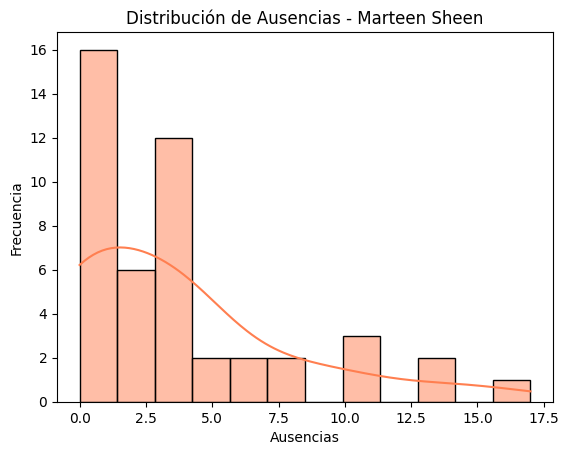

In [177]:
sns.histplot(data = df_MS, x = "ausencias", kde = True, bins = 12, color='coral')
plt.title("Distribución de Ausencias - Marteen Sheen")
plt.xlabel("Ausencias")
plt.ylabel("Frecuencia")
plt.show()

In [92]:
df_GP_filter["ausencias"].describe()

count    162.000000
mean       7.561728
std       10.051384
min        0.000000
25%        0.250000
50%        4.000000
75%       11.750000
max       75.000000
Name: ausencias, dtype: float64

Comparado con el otro colegio:

In [93]:
df_MS["ausencias"].describe()

count    46.000000
mean      3.760870
std       4.274913
min       0.000000
25%       0.000000
50%       3.000000
75%       4.750000
max      17.000000
Name: ausencias, dtype: float64

Esto nos corrobora que para hacer una comparacion mas precisa de desempeño, podemos recortar el dataframe del primer colegio una vez mas, esta vez exigiendo que las ausencias sean entre 0 y 17.

## 2° Filtreo por la variable **Ausencias**

In [178]:
df_GP_filter2 = df_GP_filter.copy()
df_GP_filter2 = df_GP_filter2[(df_GP_filter2["ausencias"] <= 17)]
df_GP_filter2.shape

(144, 8)

In [183]:
muestras_antes = 162
muestras_ahora = 144

porcentaje = (muestras_ahora-muestras_antes)/muestras_antes
print(f'Los datos son ahora un {abs(round(porcentaje*100,3))} % menos, de la muestra previamente filtrada al colegio "Grahan Parker".')

Los datos son ahora un 11.111 % menos, de la muestra previamente filtrada al colegio "Grahan Parker".


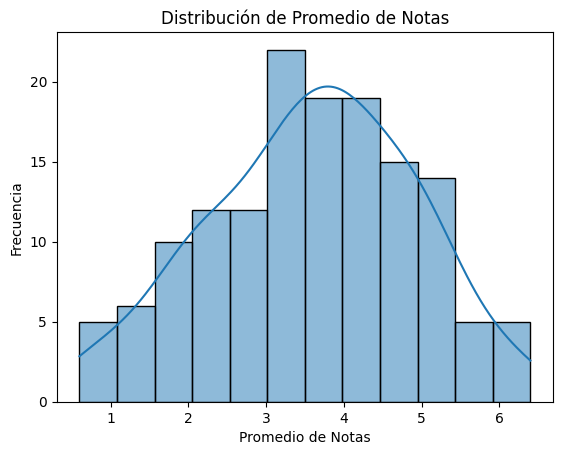

In [184]:
sns.histplot(data =df_GP_filter2, x="promedio_n", bins=12, kde = True)
plt.title("Distribución de Promedio de Notas - Grahan Parker")
plt.xlabel("Promedio de Notas")
plt.ylabel("Frecuencia")
plt.show()

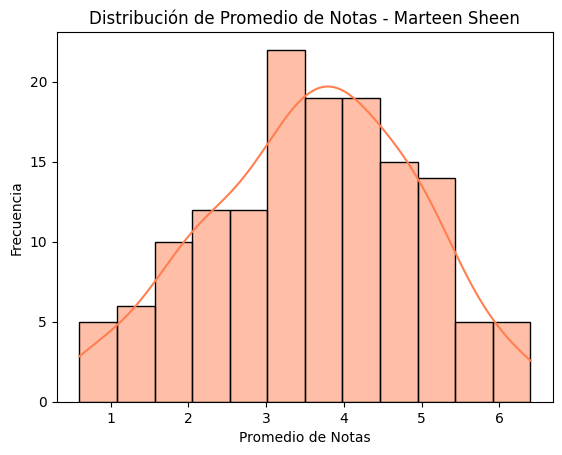

In [185]:
sns.histplot(data =df_GP_filter2, x="promedio_n", bins=12, kde = True, color = "coral")
plt.title("Distribución de Promedio de Notas - Marteen Sheen")
plt.xlabel("Promedio de Notas")
plt.ylabel("Frecuencia")
plt.show()

In [186]:
df_GP_filter2["promedio_n"].describe()

count    144.000000
mean       3.591597
std        1.315322
min        0.600000
25%        2.775000
50%        3.680000
75%        4.595000
max        6.400000
Name: promedio_n, dtype: float64

In [187]:
df_MS["promedio_n"].describe()

count    46.000000
mean      3.594348
std       1.237475
min       1.300000
25%       2.800000
50%       3.565000
75%       4.415000
max       6.500000
Name: promedio_n, dtype: float64

Para ambos colegios, considerando solo a estudiantes con el mismo rango de edad, así como el mismo rango de ausencias, el promedio de notas de ambas muestras es aproximadamente la misma, lo cual sugiere que la nueva metodología aplicada, _**No** tiene efectos significativos en estos estudiantes_.

In [188]:
df_GP_filter2["sexo"].value_counts()

F    79
M    65
Name: sexo, dtype: int64

In [194]:
ff2 = 79
mf2 = 65
totalf2 = ff2 + mf2

print(f'La proporción de estudiantes filtrados por ["Edad";"Ausencias"] de sexo femenino del colegio Grahan Parker, respecto del total es: {round((ff2/totalf2*100),3)} %.')
print(f'La proporción de estudiantes filtrados por ["Edad";"Ausencias"] de sexo masculino del colegio Grahan Parker, respecto del total es: {round((mf2/totalf2*100),3)} %.')

La proporción de estudiantes filtrados por ["Edad";"Ausencias"] de sexo femenino del colegio Grahan Parker, respecto del total es: 54.861 %.
La proporción de estudiantes filtrados por ["Edad";"Ausencias"] de sexo masculino del colegio Grahan Parker, respecto del total es: 45.139 %.


In [106]:
df_MS["sexo"].value_counts()

F    25
M    21
Name: sexo, dtype: int64

In [195]:
fms = 25
mms = 21
totalms = fms + mms

print(f'La proporción de estudiantes de sexo femenino del colegio Marteen Sheen, respecto del total es: {round((fms/totalms*100),3)} %.')
print(f'La proporción de estudiantes de sexo masculino del colegio Marteen Sheen, respecto del total es: {round((mms/totalms*100),3)} %.')

La proporción de estudiantes de sexo femenino del colegio Marteen Sheen, respecto del total es: 54.348 %.
La proporción de estudiantes de sexo masculino del colegio Marteen Sheen, respecto del total es: 45.652 %.


Las muestras utilizadas para evaluar la hipótesis, no solo se parecen en rangos de edad y ausencias de los estudiantes, sino que también las proporciones entre estudiantes de sexo femenino y masculino en cada muestra, es casi la misma, aunque los tamaños de las muestras siguen sin ser el mismo.
A lo cual serán utilizadas para evaluarlas en pruebas de hipótesis.


# Evaluación de hipotesis
Se realizan pruebas para evaluar la hipotesis de que la nueva metodologia tendrá un impacto significativo en el aumento del promedio de notas de los estudiantes.

In [209]:
from scipy.stats import mannwhitneyu

# Ejemplo de dos grupos de datos
promedios_colegio_1 = df_GP_filter2["promedio_n"]
promedios_colegio_2 = df_MS["promedio_n"]

# Aplicar la prueba de Wilcoxon-Mann-Whitney
stat, p_value = mannwhitneyu(promedios_colegio_1, promedios_colegio_2)

# Imprimir los resultados
print("Estadístico U:", stat)
print("Valor p:", p_value)

#No podemos rechazar la hipótesis nula por lo cual asumiremos que las medianas son aproximandamente iguales.

Estadístico U: 3345.0
Valor p: 0.9202509714421823


In [198]:
from scipy.stats import ttest_ind

def permutation_test(x, y, n_permutations=10000):
    np.random.seed(0)
    observed_statistic = np.mean(x) - np.mean(y)
    pooled = np.concatenate((x, y))
    permutations = np.zeros(n_permutations)

    for i in range(n_permutations):
        np.random.shuffle(pooled)
        perm_x = pooled[:len(x)]
        perm_y = pooled[len(x):]
        perm_statistic = np.mean(perm_x) - np.mean(perm_y)
        permutations[i] = perm_statistic

    p_value = np.sum(permutations >= observed_statistic) / n_permutations
    return observed_statistic, p_value

# Obtener los arrays de los promedios de notas para cada colegio
promedios_GP = df_GP_filter2["promedio_n"]
promedios_MS = df_MS["promedio_n"]

# Aplicar la prueba de permutación
estadistica_observada, p_value = permutation_test(promedios_GP, promedios_MS)

# Imprimir los resultados
print("Estadística observada:", estadistica_observada)
print("Valor p:", p_value)

Estadística observada: -0.0027506038647340247
Valor p: 0.4974


In [207]:
from scipy.stats import ttest_ind

# Obtener los arrays de los promedios de notas para cada colegio
promedios_colegio_1 = df_GP_filter2["promedio_n"]
promedios_colegio_2 = df_MS["promedio_n"]

# Aplicar la prueba t de Student
t_statistic, p_value = ttest_ind(promedios_colegio_1, promedios_colegio_2)

# Imprimir los resultados
print("Estadístico t:", t_statistic)
print("Valor p:", p_value)

Estadístico t: -0.012520838638004655
Valor p: 0.9900233541523786


Dado el valor de p en esta prueba, como es muy grande, NO podemos rechazar la hipotesis nula, ya que pueden haber otras efectos y/o ruidos afectando que no hemos tenido en consideracion. Sin embargo, el valor de t nos dice que los valores de los promedios de los estudiantes de cada muestra escogida de cada colegio, tienen una diferencia despreciable.

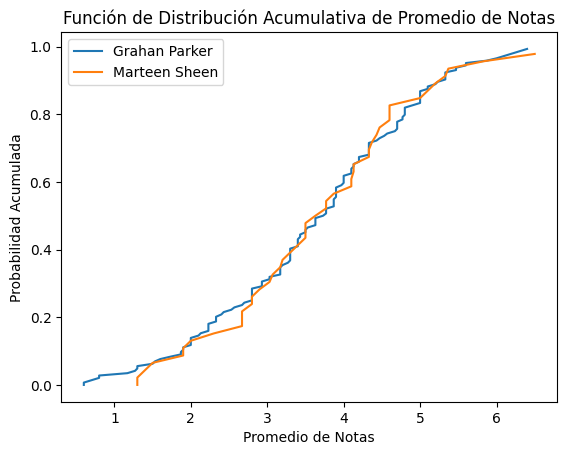

In [199]:
# Obtener los promedios de notas de cada colegio
promedios_colegio_1 = df_GP_filter2["promedio_n"]
promedios_colegio_2 = df_MS["promedio_n"]

# Graficar la FDA de cada colegio
plt.plot(sorted(promedios_colegio_1),
         [i/len(promedios_colegio_1) for i in range(len(promedios_colegio_1))],
         label="Grahan Parker")
plt.plot(sorted(promedios_colegio_2),
         [i/len(promedios_colegio_2) for i in range(len(promedios_colegio_2))],
         label="Marteen Sheen")

# Configurar el título y las etiquetas de los ejes
plt.title("Función de Distribución Acumulativa de Promedio de Notas")
plt.xlabel("Promedio de Notas")
plt.ylabel("Probabilidad Acumulada")

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

En este grafico FDA, en general, el promedio de las notas se comporta de manera similar en ambos colegios, siendo lo único diferente el promedio de notas máximo y mínimo entre cada colegio, en el colegio Marteen Sheen, se ve que estos valores son mayores en comparación al colegio Grahan Parker.

# Matrices de Correlación

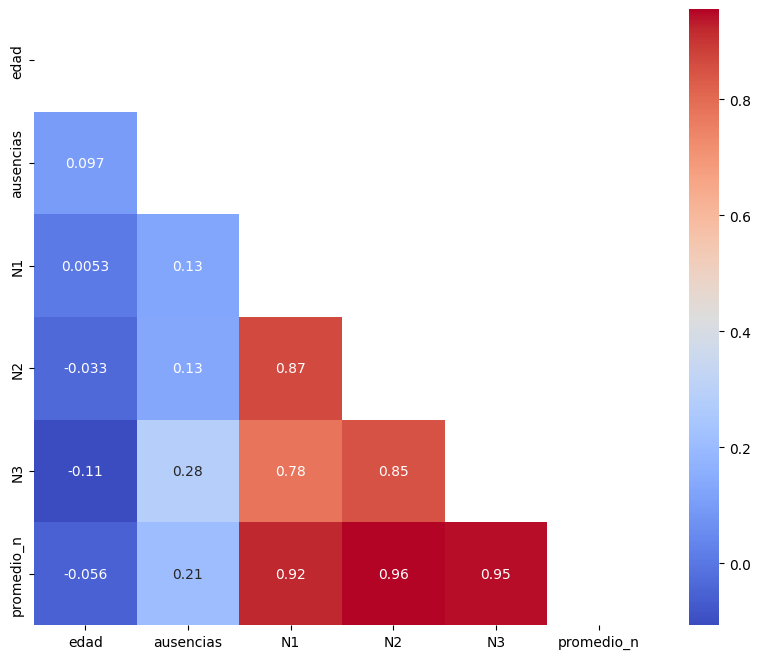

In [215]:
# Seleccionar solo las columnas numéricas
numeric_columns = df_GP_filter2.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()
mask = np.triu(np.ones_like(numeric_columns.corr(), dtype=bool))

# Crear el mapa de calor con cuadros más grandes
plt.figure(figsize=(10, 8))  # Ajusta el tamaño de la figura
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, square=True,mask = mask,)

# Mostrar el mapa de calor
plt.show()


Según este análisis de correlación para el colegio que aplica la nueva metodología, el promedio de notas no tiene una relación clara con la edad de los alumnos (relación negativa) , pero tiene una relación levemente clara con las ausencias (relación positiva), aunque contra intuitiva, según esto, a mayor la cantidad de ausencias mayor será el promedio de las notas, algo que se necesita indagar más.

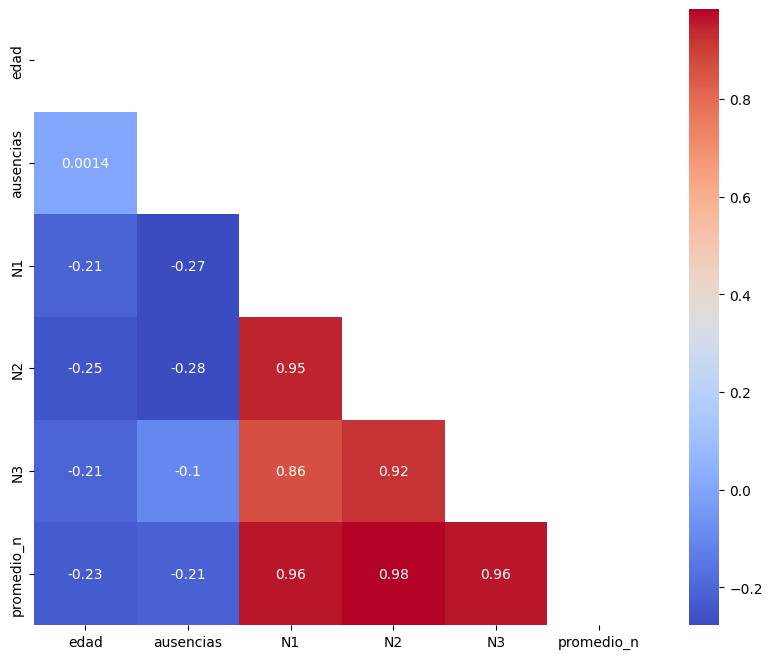

In [216]:
# Seleccionar solo las columnas numéricas
numeric_columns = df_MS.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()
mask = np.triu(np.ones_like(numeric_columns.corr(), dtype=bool))

# Crear el mapa de calor con cuadros más grandes
plt.figure(figsize=(10, 8))  # Ajusta el tamaño de la figura
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, square=True,mask = mask,)

# Mostrar el mapa de calor
plt.show()

Para el colegio que no aplico la nueva metodología, es más clara la relación entre el promedio de notas y la edad (relación negativa), según esto, a medida que la edad de los estudiantes crece, menor será el promedio de notas alcanzado, además, ahora se ve una relación distinta con el número de ausencias, a medida que estas crecen, el promedio decrece (relación negativa), como uno pensaría que sucede habitualmente (habría que generar más herramientas y/o ejercicios para deslumbrar más efectos).

# Conclusión final:

Se concluye para el análisis estadístico, que para estudiantes que van desde los 17 a los 21 años de ambos colegios, con el mismo rango de ausencias y con aproximadamente la misma proporción de estudiantes de sexo masculino y femenino, **que la nueva metodología en el primer colegio no tuvo un impacto significativo en los resultados medidos en el promedio de notas**, por lo que se concluye que esta nueva metodología no es la más certera si se quiere mejorar en el resultado de notas.

Sin embargo, según los valores p de distintas pruebas, aun _no se puede rechazar la Hipótesis Nula_, de que la nueva metodología mejora los promedios, pues seguramente se esta omitiendo o/y afectando alguna variable por desconocimientos, ruidos o gap's en los datos.